In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-data/car.data


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree

In [2]:
df=pd.read_csv('/kaggle/input/car-data/car.data' , delimiter=",", names=['buying', 'maint', 'doors','person','lug_boot','safety','target'])

df.head()

,buying,maint,doors,person,lug_boot,safety,target
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [3]:
df.shape

(1728, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   person    1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   target    1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


Here we see that the data type of every column is object means no any numeric values 

In [5]:
# Encoding all column in to number Using LabelEncoder

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for col in df.columns:
    df[col]=le.fit_transform(df[col])

df.head()

,buying,maint,doors,person,lug_boot,safety,target
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


Plot Histogram of all column to show the distribution 

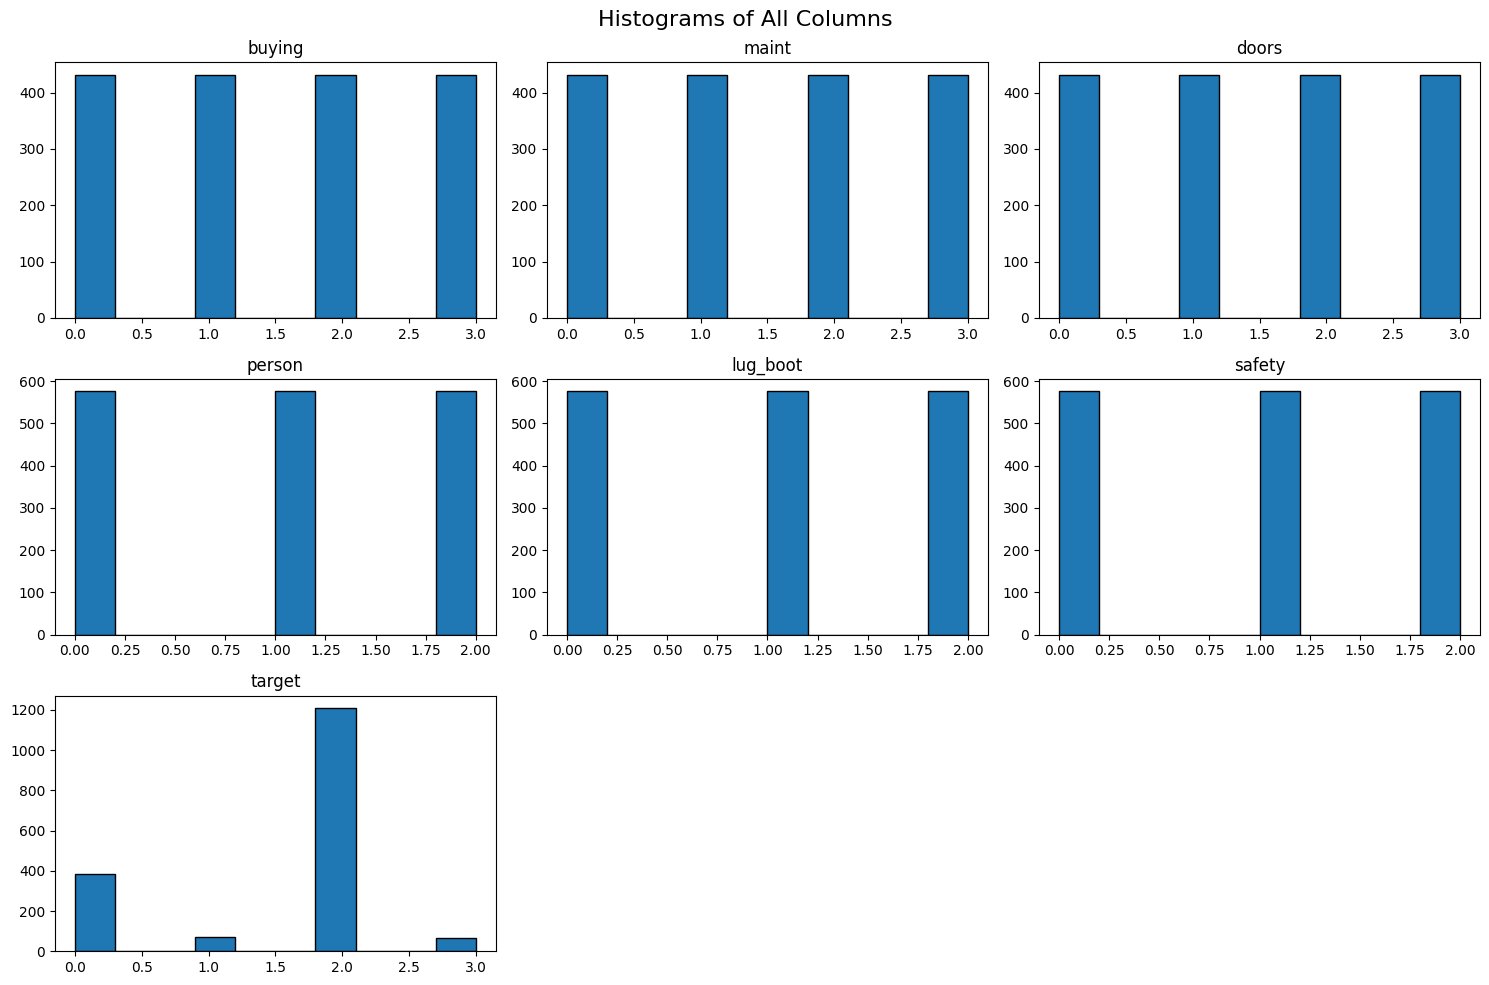

In [6]:
df.hist(figsize=(15, 10), edgecolor='black', grid=False)
plt.suptitle("Histograms of All Columns", fontsize=16)
plt.tight_layout()
plt.show()

from this graphs we see that column =['person','lug_boot', 'safety'] is less entropy means it gives more information gain then its probability to select first is high than others.

Splitting Data

In [7]:
X= df.drop(columns=['target'], axis=1)
X.head()

,buying,maint,doors,person,lug_boot,safety
0,3,3,0,0,2,1
1,3,3,0,0,2,2
2,3,3,0,0,2,0
3,3,3,0,0,1,1
4,3,3,0,0,1,2


In [8]:
y=df['target']
y.head()

0    2
1    2
2    2
3    2
4    2
Name: target, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train, y_test= train_test_split( X,y, test_size=0.25, random_state=42)


In [10]:
X_train.shape

(1296, 6)

**Using GINI Impurity**

In [11]:
from sklearn.tree import DecisionTreeClassifier


model_gini=DecisionTreeClassifier()

model_gini.fit(X_train, y_train)

DecisionTreeClassifier()

In [12]:

for i in range(X.columns.shape[0]):
    root_feature_index = model_gini.tree_.feature[i]

# Get the root column name
    root_column_name = X_train.columns[root_feature_index]
    print(f" {i+1}th Selectd column when splitting is",root_column_name)

 1th Selectd column when splitting is person
 2th Selectd column when splitting is lug_boot
 3th Selectd column when splitting is safety
 4th Selectd column when splitting is maint
 5th Selectd column when splitting is buying
 6th Selectd column when splitting is doors


In [14]:
from sklearn.metrics import *
y_pred_gini = model_gini.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_gini)*100)

Accuracy: 97.22222222222221


In [15]:
print(classification_report(y_pred_gini,y_test))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96        98
           1       0.87      0.65      0.74        20
           2       1.00      1.00      1.00       295
           3       0.85      0.89      0.87        19

    accuracy                           0.97       432
   macro avg       0.91      0.88      0.89       432
weighted avg       0.97      0.97      0.97       432



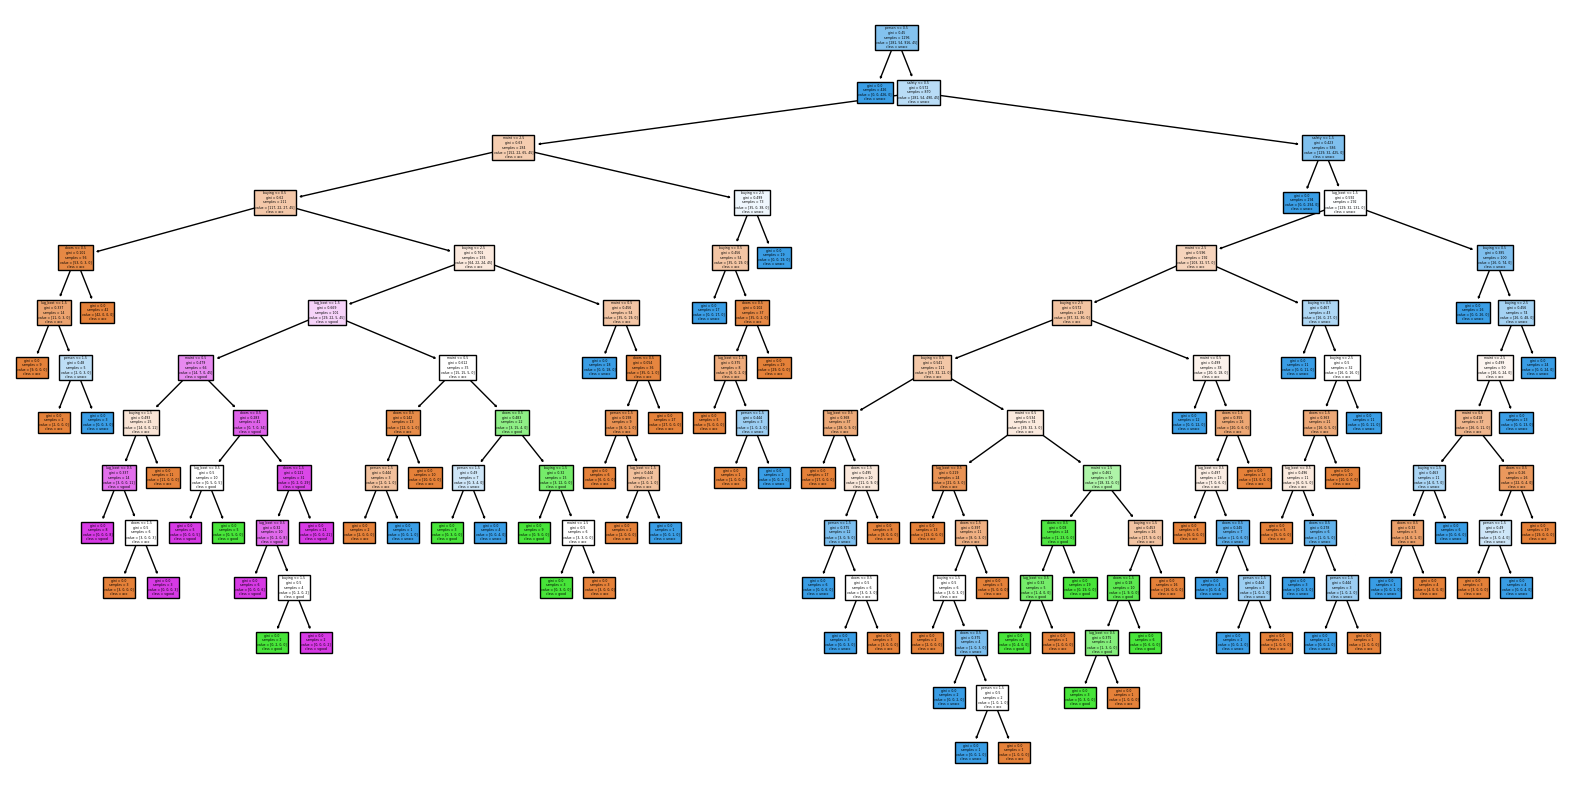

In [16]:

plt.figure(figsize=(20,10))
tree.plot_tree(model_gini, feature_names=X.columns, class_names=le.classes_, filled=True)
plt.show()

**Using ENTROPY** 

In [17]:
from sklearn.tree import DecisionTreeClassifier


model_entropy=DecisionTreeClassifier(criterion='entropy')

model_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [18]:
for i in range(X.columns.shape[0]):
    root_feature_index = model_entropy.tree_.feature[i]

# Get the root column name
    root_column_name = X_train.columns[root_feature_index]
    print(f" {i+1}th Selectd column when splitting is",root_column_name)

 1th Selectd column when splitting is person
 2th Selectd column when splitting is lug_boot
 3th Selectd column when splitting is safety
 4th Selectd column when splitting is buying
 5th Selectd column when splitting is buying
 6th Selectd column when splitting is maint


In [20]:
from sklearn.metrics import *
y_pred = model_entropy.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred)*100)

Accuracy: 97.22222222222221


In [21]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96        98
           1       0.87      0.65      0.74        20
           2       1.00      1.00      1.00       295
           3       0.85      0.89      0.87        19

    accuracy                           0.97       432
   macro avg       0.91      0.88      0.89       432
weighted avg       0.97      0.97      0.97       432



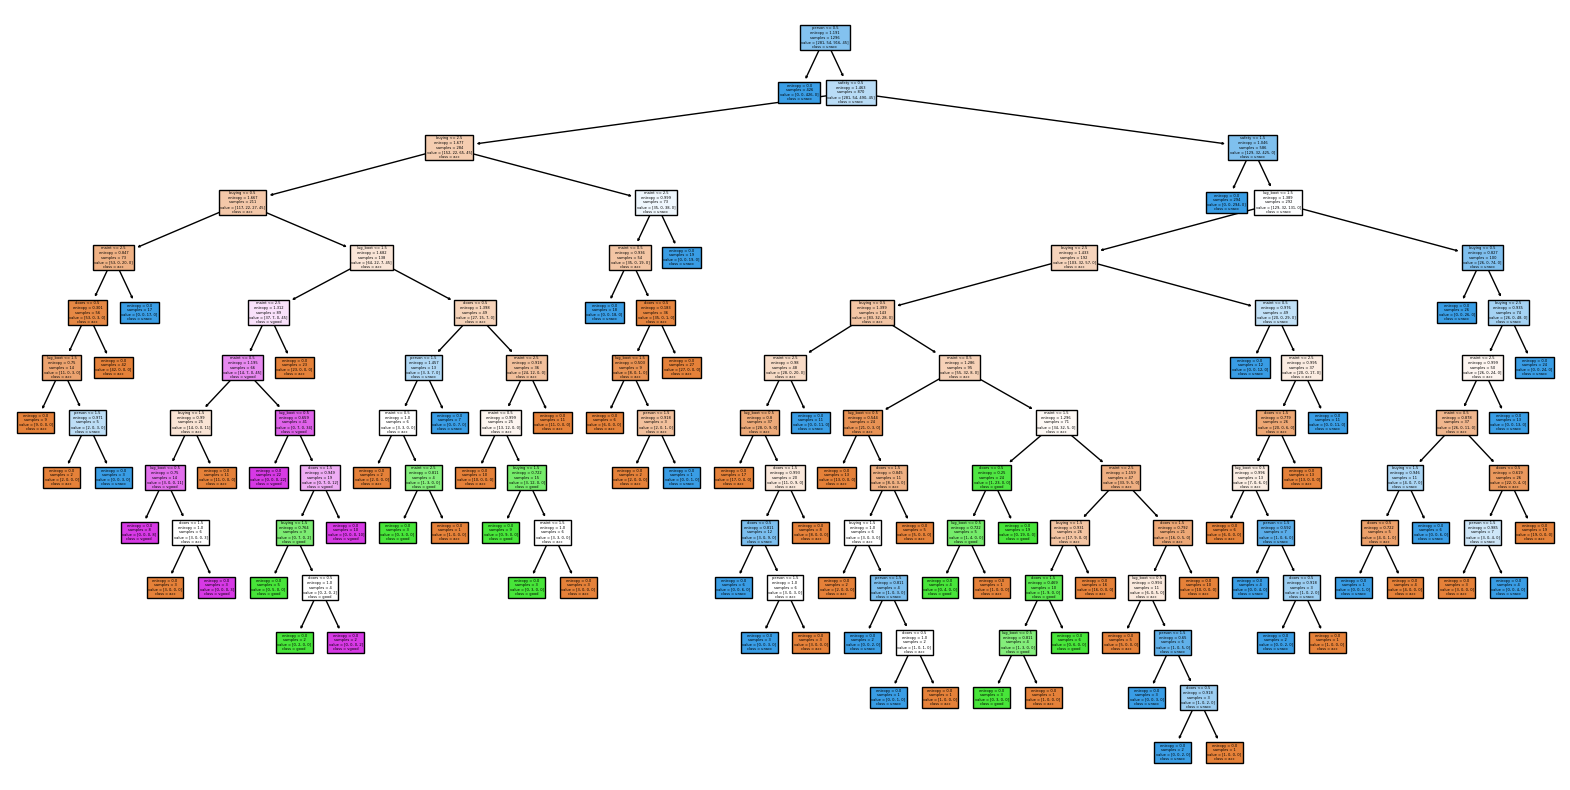

In [23]:

plt.figure(figsize=(20,10))
tree.plot_tree(model_entropy, feature_names=X.columns, class_names=le.classes_, filled=True)
plt.show()

In [24]:
# Confusion matrices
cm_gini = confusion_matrix(y_test, y_pred_gini)
cm_entropy = confusion_matrix(y_test, y_pred)

Comparing both GINI and Entropy using Heatmap 

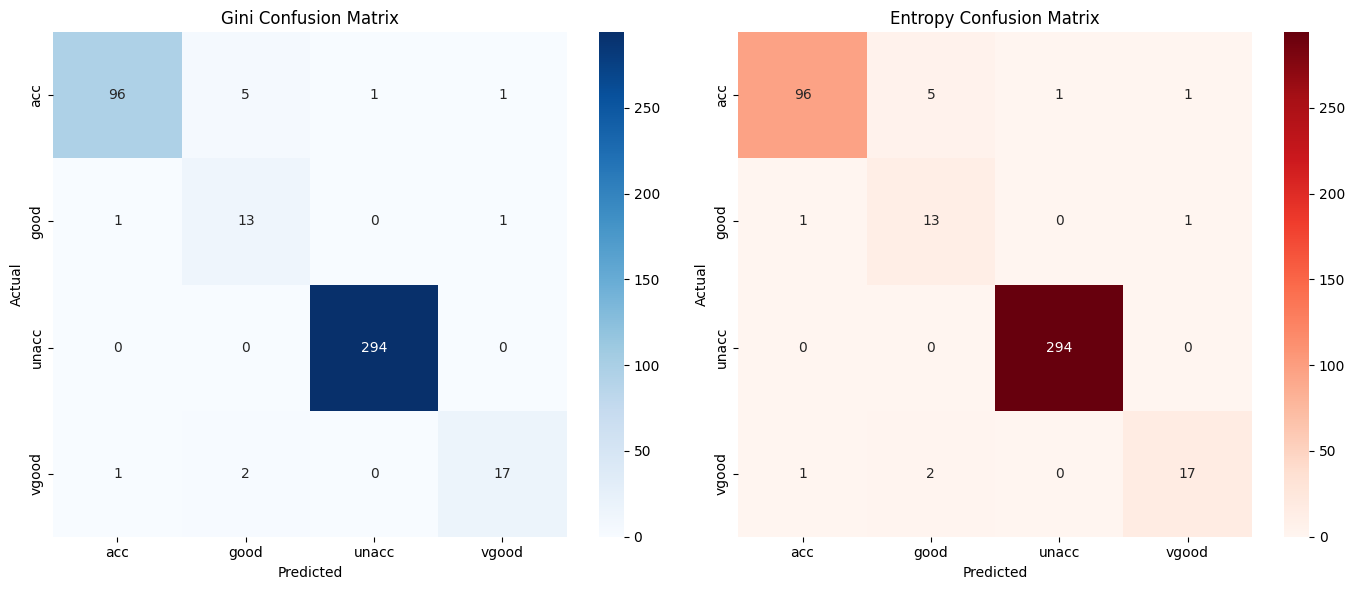

In [26]:


fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.heatmap(cm_gini, annot=True, fmt='d', cmap='Blues', ax=axes[0], 
            xticklabels=le.classes_, yticklabels=le.classes_)
axes[0].set_title('Gini Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(cm_entropy, annot=True, fmt='d', cmap='Reds', ax=axes[1], 
            xticklabels=le.classes_, yticklabels=le.classes_)
axes[1].set_title('Entropy Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()